### Word Embedding using Gensim

Gensim is an open-source library for unsupervised topic modeling and natural language processing.

https://radimrehurek.com/gensim/index.html

Apply `Word2Vec` `FastText` `GloVe`

📍 Roadmap

1. Download data & preprocess & tokenize
2. Train Word2Vec model
3. Train FastText model
4. Train Gensim model  
5. Limitations  
6. Use Pretrained model

In [ ]:
# -------------------------------------------------------------
# Gensim models for Word Embedding
import gensim 
from gensim.models import Word2Vec, KeyedVectors
from gensim.models import FastText
! pip install glove_python_binary
from glove import Corpus, Glove
# -------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
from lxml import etree
import re
import time, datetime
import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 948 kB 4.3 MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### 1. Download data & preprocess & tokenize

In [ ]:
import urllib

urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", 
                           filename="teddata.xml")

('teddata.xml', <http.client.HTTPMessage at 0x7f81e3b8ca10>)

In [ ]:
import requests

with open('./teddata.xml', 'wb') as f :
  response = requests.get("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml")
  f.write(response.content)

In [ ]:
data_xml = open('teddata.xml', 'r', encoding='UTF8')
print(data_xml)

data_text = etree.parse(data_xml)
print(data_text)

<_io.TextIOWrapper name='teddata.xml' mode='r' encoding='UTF8'>


In [ ]:
dataset = "\n".join(data_text.xpath('//content/text()'))

print(dataset[:2000])
print(len(dataset))

Here are two reasons companies fail: they only do more of the same, or they only do what's new.
To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation. Both are necessary, but it can be too much of a good thing.
Consider Facit. I'm actually old enough to remember them. Facit was a fantastic company. They were born deep in the Swedish forest, and they made the best mechanical calculators in the world. Everybody used them. And what did Facit do when the electronic calculator came along? They continued doing exactly the same. In six months, they went from maximum revenue ... and they were gone. Gone.
To me, the irony about the Facit story is hearing about the Facit engineers, who had bought cheap, small electronic calculators in Japan that they used to double-check their calculators.
(Laughter)
Facit did too much exploitation. But exploration can go wild, too.
A few years back, I worked closely alongside a European 

In [ ]:
# Clean data
# Remove background audio part 

dataset = re.sub(r'\(.*?\)', '', dataset)
print(dataset[:2000])

Here are two reasons companies fail: they only do more of the same, or they only do what's new.
To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation. Both are necessary, but it can be too much of a good thing.
Consider Facit. I'm actually old enough to remember them. Facit was a fantastic company. They were born deep in the Swedish forest, and they made the best mechanical calculators in the world. Everybody used them. And what did Facit do when the electronic calculator came along? They continued doing exactly the same. In six months, they went from maximum revenue ... and they were gone. Gone.
To me, the irony about the Facit story is hearing about the Facit engineers, who had bought cheap, small electronic calculators in Japan that they used to double-check their calculators.

Facit did too much exploitation. But exploration can go wild, too.
A few years back, I worked closely alongside a European biotech co

In [ ]:
# Sentence Tokenize
data_sent = sent_tokenize(dataset)

print(len(data_sent))
print(data_sent[:10])

273435
["Here are two reasons companies fail: they only do more of the same, or they only do what's new.", 'To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation.', 'Both are necessary, but it can be too much of a good thing.', 'Consider Facit.', "I'm actually old enough to remember them.", 'Facit was a fantastic company.', 'They were born deep in the Swedish forest, and they made the best mechanical calculators in the world.', 'Everybody used them.', 'And what did Facit do when the electronic calculator came along?', 'They continued doing exactly the same.']


In [ ]:
# lower & remove marks
cleaned_sent = []
for sent in data_sent :
  sent = re.sub(r"[^a-z0-9]+", ' ', sent.lower())
  cleaned_sent.append(sent)

# tokenize
data_tokens = [word_tokenize(sent) for sent in cleaned_sent]


In [ ]:
for sent in data_tokens[:5]:
  print(sent)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']
['consider', 'facit']
['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them']


### 2. Train Word2Vec model

- `size` embedding dim
- `window` context window size
- `min_count` word minimum count
- `workers` process (thread) num
- `sg` 0 for CBOW, 1 for skip-gram

Input should be tokenized.

In [ ]:
word2vec = Word2Vec(sentences = data_tokens, size = 200, window = 4, min_count = 5, workers = 4, sg = 1)

`model.wv` <gensim.models.keyedvectors.Word2VecKeyedVectors>  
`model.wv.vocab` 'capacity': <gensim.models.keyedvectors.Vocab at 0x7f81caab7f10>  
`model.wv['word']` vector array  
`model.wv.vectors` vocab size x embedding dim matrix  
`model.wv.most_similar()`  
`model.wv.similarity(w1, w2)`  


In [ ]:
word2vec.wv.vectors.shape # Original data (with 21613 words) embedded to 200-dimension

(21613, 200)

In [ ]:
# Get similarity
# wv.similarity() : Compute cosine similarity between two words

print("Computer & Human : ", word2vec.wv.similarity("computer", "human"))
print("Computer & Robot : ", word2vec.wv.similarity("computer", "robot"))

Computer & Human :  0.26182365
Computer & Robot :  0.5709696


In [ ]:
word_vectors = word2vec.wv 

# key : word
# Visualize 300 words
words = list(word_vectors.vocab.keys())[:300]

# value : vector
vectors = [word_vectors[word] for word in words]

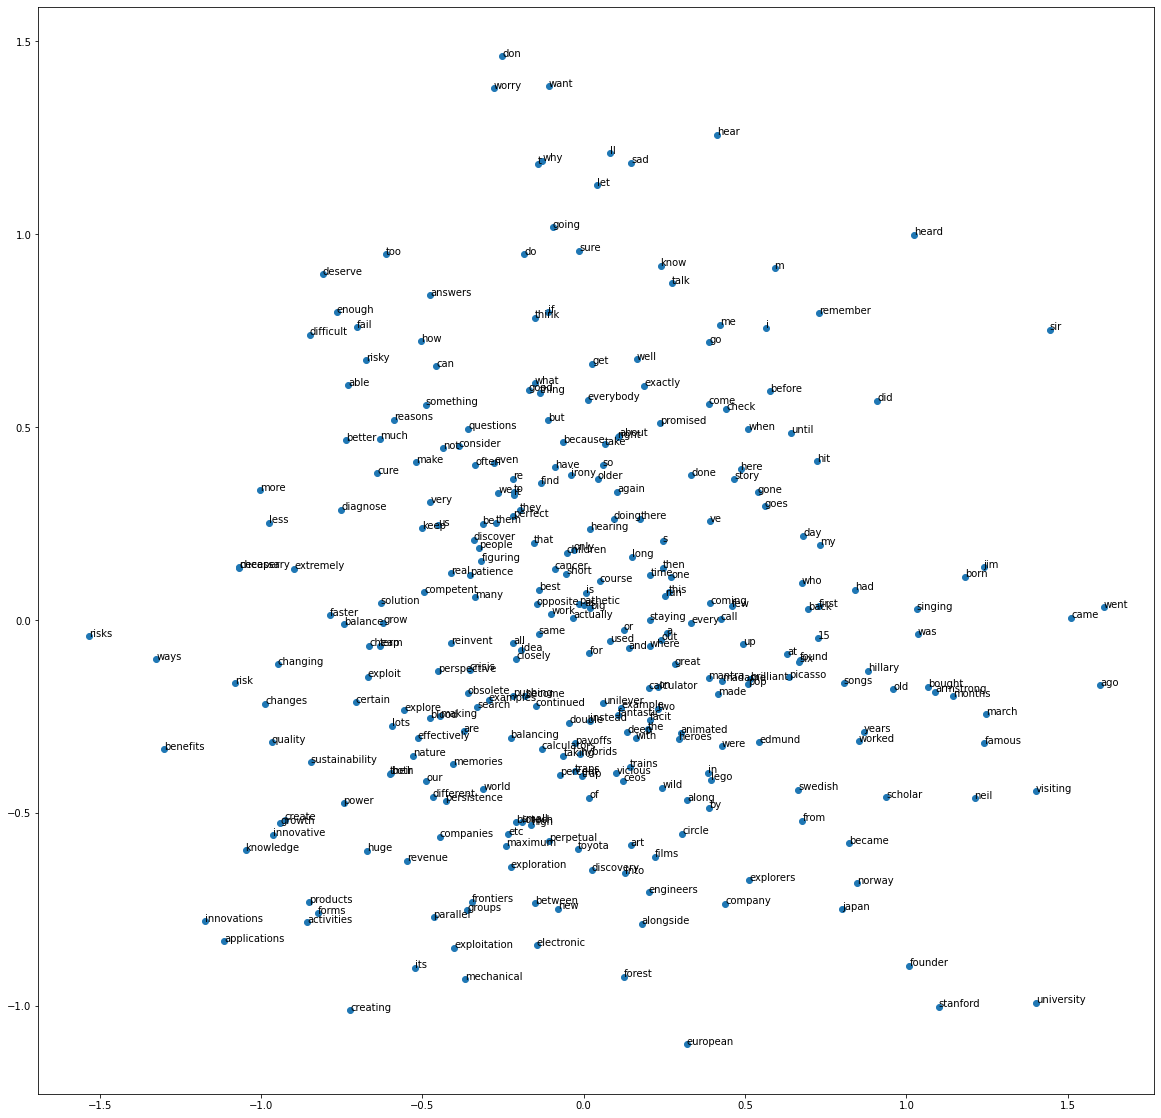

In [ ]:
# Plot 2D embedding space

import matplotlib.pyplot as plt

def plot_embedding(words, xs, ys):
  plt.figure(figsize=(20,20))
  plt.scatter(xs, ys, marker='o')
  for i, vocab in enumerate(words):
    plt.annotate(vocab, xy=[xs[i], ys[i]])

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
xys = pca.fit_transform(vectors)

plot_embedding(words, xys[:,0], xys[:,1])

In [ ]:
# Save & load model

## method 1
model.wv.save_word2vec_format('w2v')
loaded_model = KeyedVectors.load_word2vec_format('w2v')

## method 2
model.save('w2v.model')
loaded_model = Word2Vec.load('w2v.model')

In [ ]:
# Out Of Vocabulary problem.
# Still, Word2Vec model cannot understand the inside meanings of a word.

word2vec.wv.most_similar("econometric")

KeyError: ignored

In [ ]:
# Thus unable to handle typo

word2vec.wv.most_similar("computeer")

KeyError: ignored

### 3. Train FastText model

Train, use and evaluate word representations learned using the method
described in  

Enriching Word Vectors with Subword Information <https://arxiv.org/abs/1607.04606> (FastText)  

Solve OOV problem by N-gram.  
Assumption : One word contains multiple words. -> `Subword`  
Word = n-gram subwords  

e.g. tri-gram  
computer = <com, omp, mpu, put, ute, ter>


In [ ]:
fasttext = FastText(sentences = data_tokens, sg = 1, size = 200, window = 5, min_count = 5, workers = 4)

In [ ]:
fasttext.wv.most_similar('econometric')

[('metric', 0.7786107063293457),
 ('economy', 0.764862060546875),
 ('economical', 0.7647345066070557),
 ('biometric', 0.7574567794799805),
 ('economies', 0.7561229467391968),
 ('economic', 0.7530205249786377),
 ('volumetric', 0.7470800876617432),
 ('asymmetric', 0.7206354737281799),
 ('geometric', 0.7202425003051758),
 ('metrics', 0.7092437148094177)]

In [ ]:
fasttext.wv.most_similar('computeer')

[('compute', 0.9264343976974487),
 ('computer', 0.914973258972168),
 ('computers', 0.8721396923065186),
 ('supercomputer', 0.8576502203941345),
 ('computerized', 0.852070689201355),
 ('computing', 0.8086376786231995),
 ('supercomputers', 0.8076087832450867),
 ('computable', 0.7648573517799377),
 ('compulsory', 0.7637267112731934),
 ('amputee', 0.7149981260299683)]

In [ ]:
word2vec.wv.most_similar('coworker') # Very ungeneralized...

[('shanti', 0.9323474168777466),
 ('brahmin', 0.9300825595855713),
 ('eli', 0.9295336008071899),
 ('baakir', 0.9196676015853882),
 ('bobo', 0.9194145202636719),
 ('cloak', 0.9187523722648621),
 ('abaya', 0.9186921715736389),
 ('byron', 0.9183844923973083),
 ('morgana', 0.9177123308181763),
 ('marsha', 0.9176471829414368)]

In [ ]:
fasttext.wv.most_similar('coworker') # Able to catch underlying meanings & subwords!

[('worker', 0.8840386271476746),
 ('coworkers', 0.8175582885742188),
 ('homemaker', 0.8000209927558899),
 ('homeowner', 0.7518882751464844),
 ('welder', 0.7496193647384644),
 ('yorker', 0.7381049394607544),
 ('foyer', 0.7249165773391724),
 ('cowboy', 0.7238461375236511),
 ('boyfriend', 0.7201279401779175),
 ('puppeteer', 0.7160971164703369)]

### 4. Train GloVe model

In [ ]:
corpus = Corpus()
corpus.fit(data_tokens, window = 5)

glove = Glove(no_components = 100, learning_rate = 0.05)
glove.fit(corpus.matrix, epochs = 20, no_threads = 4, verbose = True)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [ ]:
glove.add_dictionary(corpus.dictionary)

In [ ]:
glove.most_similar('econometric')

[('tyndall', 0.985740274596381),
 ('ibex', 0.9857017582958003),
 ('wobbles', 0.9855299767523034),
 ('peeters', 0.9843578935528682)]

In [ ]:
glove.most_similar('coworker')

[('nationalist', 0.9768262478776732),
 ('headscarf', 0.9759985604012577),
 ('montages', 0.9730776389941159),
 ('vip', 0.9722962305446126)]

In [ ]:
glove.most_similar('communicate')

[('connect', 0.8928476610160689),
 ('begin', 0.8919779324460554),
 ('interact', 0.8841426845713365),
 ('associate', 0.8140830791993302)]

### 5. Limitations

In [ ]:
word2vec.wv.similarity('more', 'less')

0.7411268

In [ ]:
word2vec.wv.most_similar('software')

[('hardware', 0.789627194404602),
 ('algorithms', 0.7194214463233948),
 ('kit', 0.7118356227874756),
 ('cad', 0.703421413898468),
 ('encryption', 0.6992408037185669),
 ('wireless', 0.6834648847579956),
 ('apps', 0.6817251443862915),
 ('computing', 0.6776471138000488),
 ('biotechnology', 0.676239013671875),
 ('custom', 0.676200270652771)]

In [ ]:
fasttext.wv.most_similar('software')

[('hardware', 0.8197693824768066),
 ('autodesk', 0.7161372900009155),
 ('automobile', 0.6931858658790588),
 ('toolkit', 0.6888656616210938),
 ('computing', 0.6874196529388428),
 ('autopilot', 0.687359631061554),
 ('programmable', 0.6872255802154541),
 ('nanotechnology', 0.6783921718597412),
 ('algorithms', 0.6774812340736389),
 ('beware', 0.6770249605178833)]

In [ ]:
print("HW & SW similarity :", word2vec.wv.similarity("hardware", "software"))
print("HW & SW similarity :", fasttext.wv.similarity("hardware", "software"))

HW & SW similarity : 0.7896272
HW & SW similarity : 0.81976944


In [ ]:
glove.most_similar('software')

[('program', 0.8729478538184322),
 ('material', 0.8437622902595867),
 ('device', 0.8338239965891364),
 ('industry', 0.833146754644673)]

👀 It's true that objects in similar domain are likely to appear in the same context, but it doesn't mean they have the same meaning.  
So embedding them in a similar space is not appropriate for further tasks.  

### 6. Not trained enough? 

Use pretrained model.  
Google Word2Vec  
https://code.google.com/archive/p/word2vec/

In [ ]:
# Use pretrained model

google_model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

print(google_model.vectors.shape) # model size (3000000, 300)

(3000000, 300)


In [ ]:
print("HW & SW similarity")
print("word2vec :", word2vec.wv.similarity("hardware", "software"))
print("fasttext :", fasttext.wv.similarity("hardware", "software"))
print("Pretrained model :", google_model.similarity("hardware", "software"))

HW & SW similarity
word2vec : 0.7896272
fasttext : 0.81976944
Pretrained model : 0.62668186


In [ ]:
print("more & less similarity")
print("word2vec :", word2vec.wv.similarity("more", "less"))
print("fasttext :", fasttext.wv.similarity("more", "less"))
print("Pretrained model :", google_model.similarity("more", "less"))

more & less similarity
word2vec : 0.7411268
fasttext : 0.68915886
Pretrained model : 0.8099882


In [ ]:
type(google_model.wv)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [ ]:
word_of_interest = ['good', 'bad', 'excellent', 'worst', 'hardware', 'software', 'computer', 'right', 'wrong', 'he', 'she', 'king', 'queen', 
                    'beautiful', 'offend', 'success', 'fail', 'black', 'white', 'more', 'less', 'dog', 'cat', 'tiger']

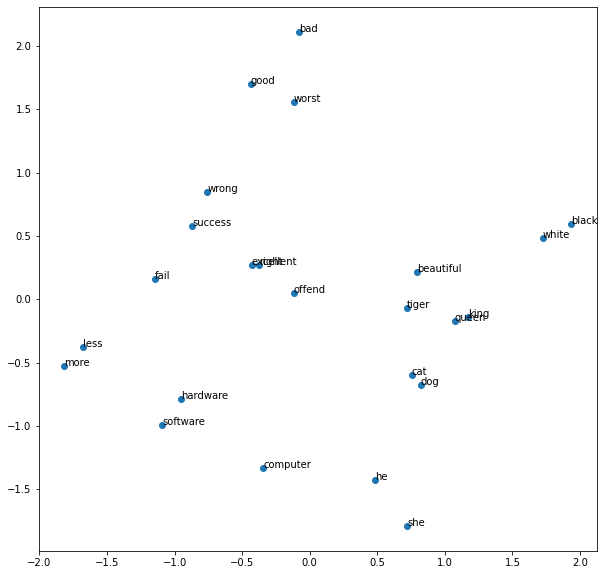

In [ ]:
# Trained on Ted
vectors_mini = [word2vec.wv[word] for word in word_of_interest]

pca = PCA(n_components = 2)
xys = pca.fit_transform(vectors_mini)

plot_embedding(word_of_interest, xys[:,0], xys[:,1])


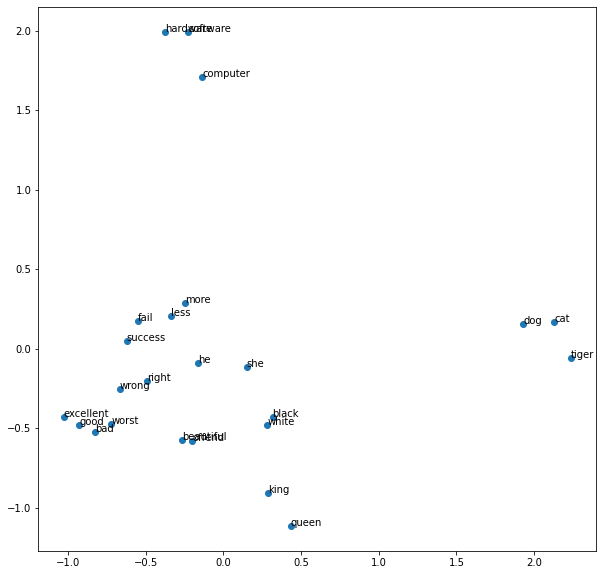

In [ ]:
# Pretrained vectors

vectors_pretrained = [google_model.wv[word] for word in word_of_interest]

pca = PCA(n_components = 2)
xys = pca.fit_transform(vectors_pretrained)

plot_embedding(word_of_interest, xys[:,0], xys[:,1])

👀 Words woth similar categories are more clustered.  
But still not able to capture more than just a concept.  

📍 Need new method...